## [About the Data]() 
The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

##### Goal: Find a set of features that affect Life Expectancy.

## [Importing Libraries]()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## [Loading the dataset]()

In [2]:
dataset = pd.read_csv('Downloads/Life Expectancy Data.csv')

In [3]:
#first five rows of the Dataset
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#last five rows of the Dataset
dataset.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


The dataset is loaded into the IDE,we can start the EDA now.
The first step of the EDA is Data Cleaning

# [Section1: Data Cleaning]()

It's critical to comprehend the variables presented in the data in order to properly clean the data. There are several things about each variable that are crucial to understand:

1. What does the variable mean and what type of variable is it (Nominal/Ordinal/Interval/Ratio)?
2. Does the variable have missing values? If so, what should be done about them?
3. Does the variable have outliers? If so, what should be done about them?

We will address each of these queries individually for each of the variables. And you can find those solutions in this section.

### [1.1: Dataset Description and Variable Descriptions]()

This dataset is comprised of data from all over the world from various countries aggregated by the World Health Organization (WHO for short). The data is an aggregate of many indicators for a particular country in a particular year. In essence, the data is multiple indicators in a time series separated by country.

Before giving variables description, let's clean the variables/columns titles

In [5]:
original_col = list(dataset.columns)
new_col = []
for col in original_col:
     new_col.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
dataset.columns = new_col

#### variable description
1. country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
2. year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
3. status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
4. life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
5. adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
6. infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
7. alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
8. percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
9. hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
10. measles (Ratio) - number of reported Measles cases per 1000 population
11. bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
12. under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
13. polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
14. total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
15. diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
16. hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
17. gdp (Ratio) - Gross Domestic Product per capita
18. population (Ratio) - population of a country
19. thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
20. thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
21. income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. schooling (Ratio) - average number of years of schooling of a population

It would be helpful to rename the variable thinness 1-19 years to thinness 10-19 years as it more accurately describes what the variable means, as was already mentioned.

In [6]:
dataset.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

A look at the missing values for each variable should be conducted now, that the dataset and variables have been described.

### [1.2: Missing Values]()

There are few things that must be done concerning missing values:
1. finding missing values
2. Dealing with missing values

### [1.2.1: Missing Values Detection]()

In [7]:
#getting some information about the dataset
dataset.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Things that may not make sense from above:

1. Adult mortality of 1? This is likely an error in measurement, but what values make sense here? May need to change to null if under a certain threshold.
2. Infant deaths as low as 0 per 1000? That just isn't plausible - I'm deeming those values to actually be null. Also on the other end 1800 is likely an outlier, but it is possible in a country with very high birthrates and perhaps a not very high population total - this can be dealt with later.
3. BMI of 1 and 87.3? Pretty sure the whole population would not exist if that were the case. A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese, therefore a large number of these measurements just seem unrealistic...this variable might not be worth digging into at all.
4. Under Five Deaths, similar to infant deaths just isn't likely (perhaps even impossible) to have values at zero.
5. GDP per capita as low as 1.68 (USD) possible? Doubtful - but perhaps values this low are outliers.
6. Population of 34 for an entire country?

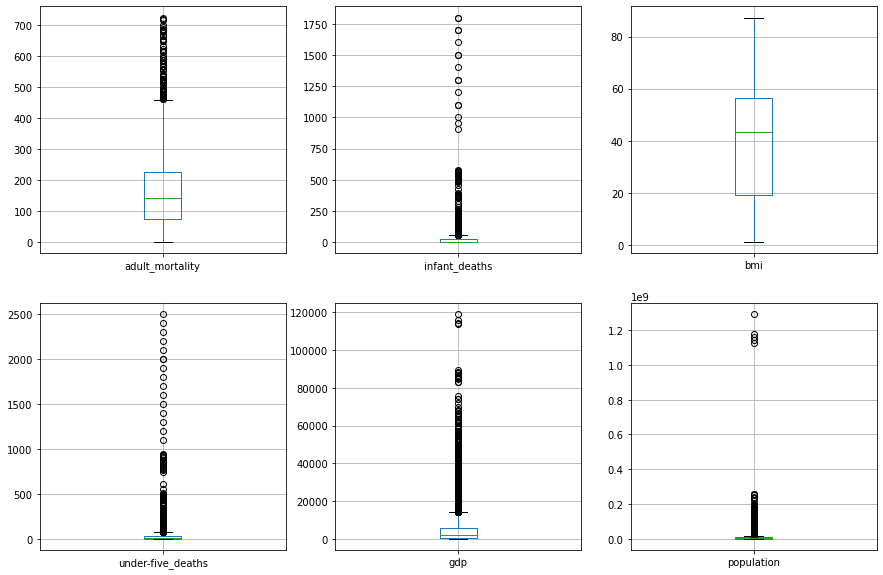

In [8]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'bmi', 'under-five_deaths', 'gdp', 'population'], start=1):
    plt.subplot(2, 3, i)
    dataset.boxplot(col)

In [9]:
mort_5_percentile = np.percentile(dataset.adult_mortality.dropna(), 5)
dataset.adult_mortality = dataset.apply(lambda x: np.nan if x.adult_mortality < mort_5_percentile else x.adult_mortality, axis=1)
dataset.infant_deaths = dataset.infant_deaths.replace(0, np.nan)
dataset.bmi = dataset.apply(lambda x: np.nan if (x.bmi < 10 or x.bmi > 50) else x.bmi, axis=1)
dataset['under-five_deaths'] = dataset['under-five_deaths'].replace(0, np.nan)

In [10]:
#getting info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2783 non-null   float64
 5   infant_deaths                    2090 non-null   float64
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              1482 non-null   float64
 11  under-five_deaths                2153 non-null   float64
 12  polio               

There seem to be a decent amount of null space

The function below attempts to do just that - it only returns the columns that contain (explicit) nulls, keeps a running total of those columns with nulls as well as their location in the dataframe, returns the count of nulls in a specified column and the percent of nulls out of all the values in the column.

In [11]:
def nulls_breakdown(dataset=dataset):
    dataset_cols = list(dataset.columns)
    cols_total_count = len(list(dataset.columns))
    cols_count = 0
    for loc, col in enumerate(dataset_cols):
        null_count = dataset[col].isnull().sum()
        total_count = dataset[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print(f'[iloc = {loc}] {col} has {null_count} null values: {percent_null}% null')
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print(f'Out of {cols_total_count} total columns, {cols_count} contain null values; {cols_percent_null}% columns contain null values.')

In [12]:
nulls_breakdown()

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 155 null values: 5.28% null
[iloc = 5] infant_deaths has 848 null values: 28.86% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 1456 null values: 49.56% null
[iloc = 11] under-five_deaths has 785 null values: 26.72% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness_10-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 16 contain null values; 72.73% columns contain null val

### [1.2.2: Dealing with Missing Values]()

All most half of the bmi values are Null, So we are removing the bmi column from our dataset

In [13]:
# dropping the bmi column from our dataset
dataset.drop(columns='bmi', inplace=True)

Alright, so it looks like there are a lot of columns containing null values, since this is time series data assorted by country, the best course of action would be to interpolate the data by country. However, when attempting to interpolate by country it doesn't fill in any values as the countries' data for all the null values are null for each year, therefore imputation by year may be the best possible method here. Imputation of each year's mean is done below.

In [14]:
imputed_dataset = []
for year in list(dataset.year.unique()):
    year_dataset = dataset[dataset.year == year].copy()
    for col in list(year_dataset.columns)[3:]:
        year_dataset[col] = year_dataset[col].fillna(year_dataset[col].dropna().mean()).copy()
    imputed_dataset.append(year_dataset)
dataset = pd.concat(imputed_dataset).copy()

In [15]:
#One more look at the null values...
nulls_breakdown(dataset)

Out of 21 total columns, 0 contain null values; 0.0% columns contain null values.


It appears that the null values were handled by this method. Hopefully, this approach can still produce significant results.

### [1.3: Outliers]()

Similar to dealing with missing values, dealing with outliers requires doing a few things:
1. Detect the outliers
2. Deal with outliers

### [1.3.1: Outliers Detection]()

To visually check for outliers, a boxplot and histogram will first be made for each continuous variable.

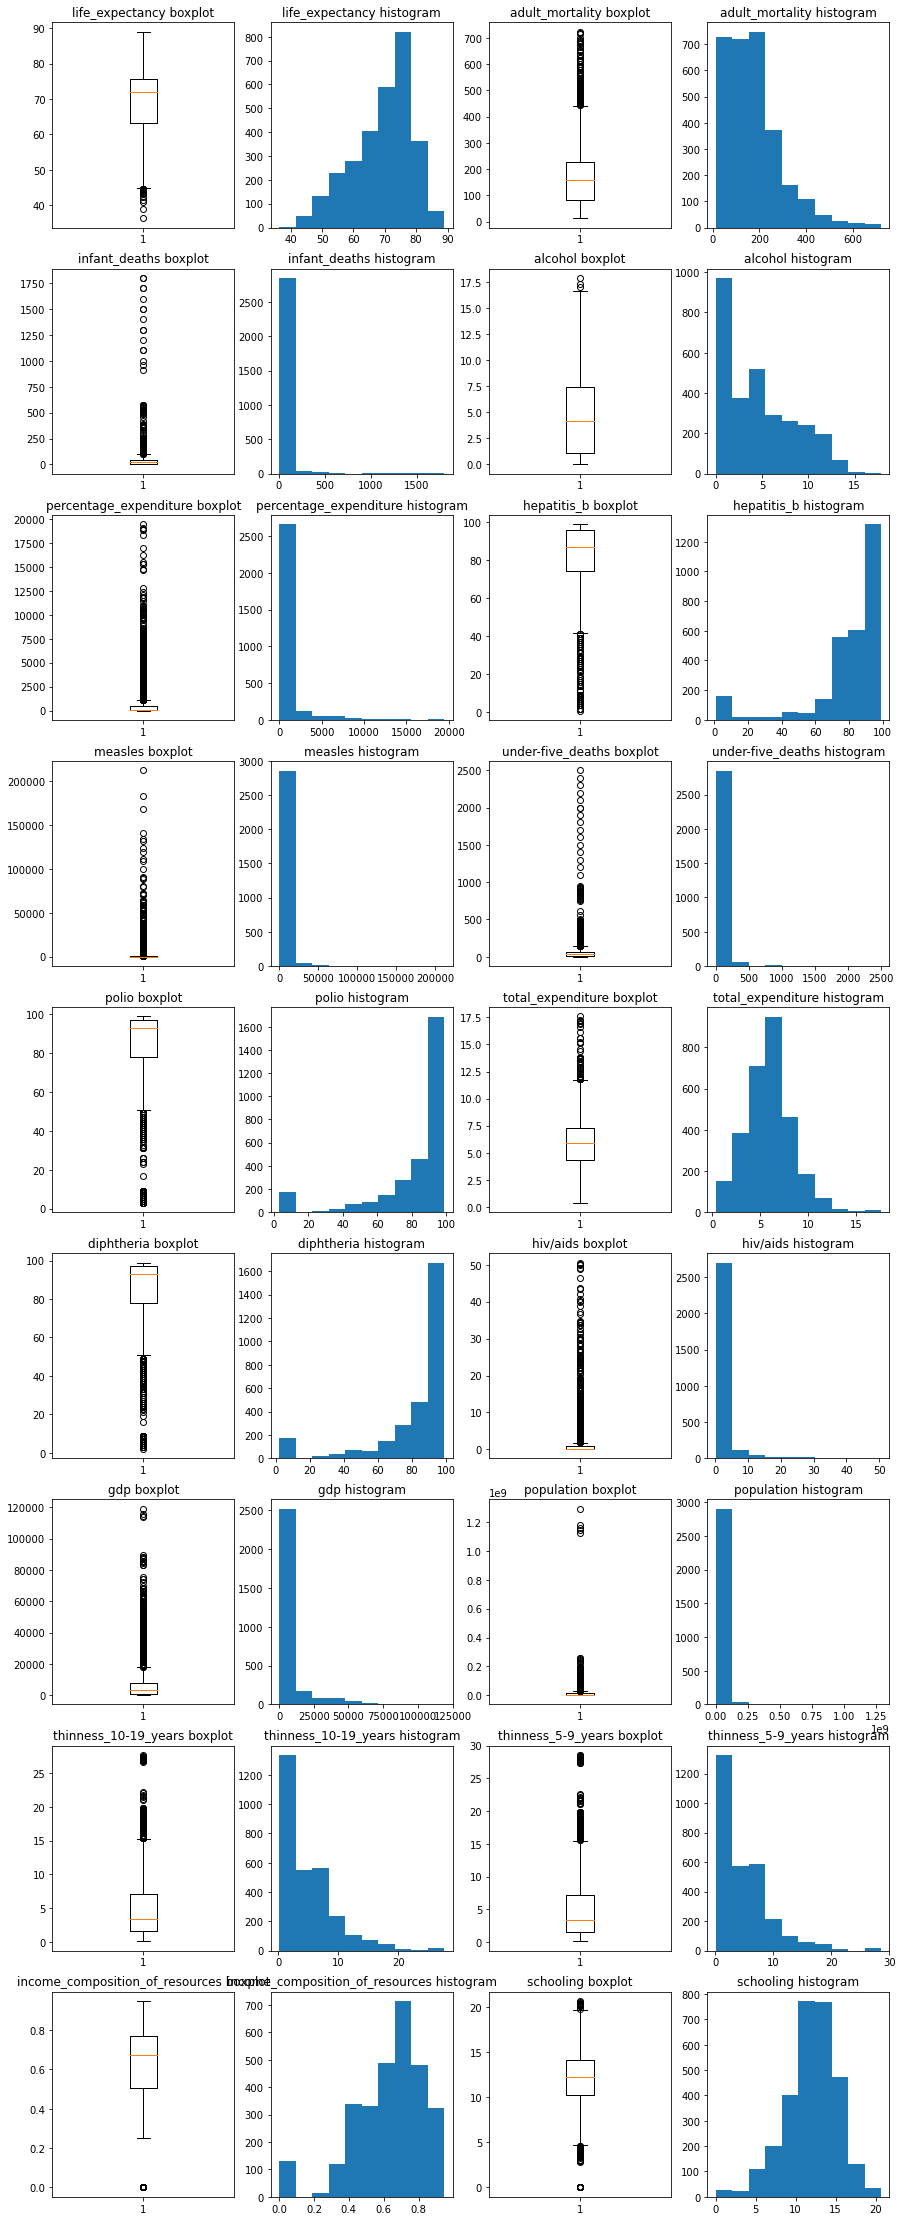

In [16]:
cont_vars = list(dataset.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(dataset)

Visually, it is obvious that each of these variables, including the target variable, life expectancy, has a number of outliers. Similar statistical analysis will be performed below using Tukey's method, with outliers defined as anything outside of 1.5 times the IQR.

In [17]:
def outlier_count(col, data=dataset):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [18]:
for col in cont_vars:
    outlier_count(col)

---------------life_expectancy---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------adult_mortality---------------
Number of outliers: 97
Percent of data that is outlier: 3.3%
---------------infant_deaths---------------
Number of outliers: 135
Percent of data that is outlier: 4.59%
---------------alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage_expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------hepatitis_b---------------
Number of outliers: 222
Percent of data that is outlier: 7.56%
---------------measles---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
---------------under-five_deaths---------------
Number of outliers: 142
Percent of data that is outlier: 4.83%
---------------polio---------------
Number of outliers: 279
Percent of data that is outlier: 9.5%
---------------total_expenditure---------------

This dataset appears to contain a fair number of outliers. What should be done with them now that they have been found?

### [1.3.2: Dealing with Outliers]()

There are a number of ways to deal with outliers in a dataset, the usual options are as follows:

1. Drop Outliers (best avoided in order to keep as much information as possible)
2. Limit values to upper and/or lower bounds (Winsorize the data)
3. Transform the data (log/inverse/square root/etc.)
    ~advantage: can 'normalize' the data and eliminate outliers
    ~disadvantage: cannot be done to variables containing values of 0 or below

In [19]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(dataset[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(dataset[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

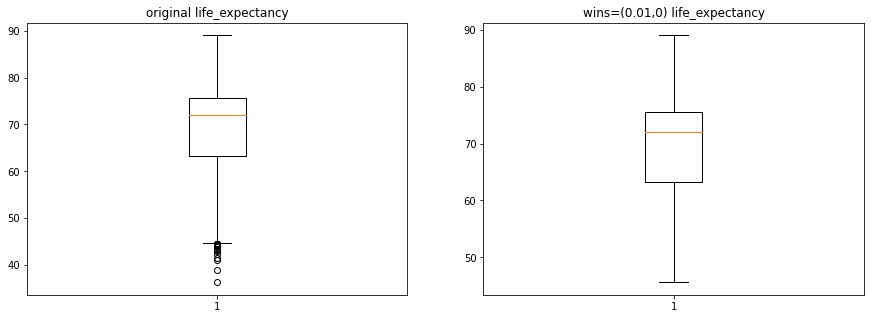

In [20]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

The plot above serves as an illustration of how the winsorization is examined visually (the rest are not shown for brevity).

All the variables have now been winsorized as little as possible in order to keep as much data in tact as possible while still being able to eliminate the outliers. Finally, small boxplots will be shown for each variable's winsorized data to show that the outliers have indeed been dealt with.

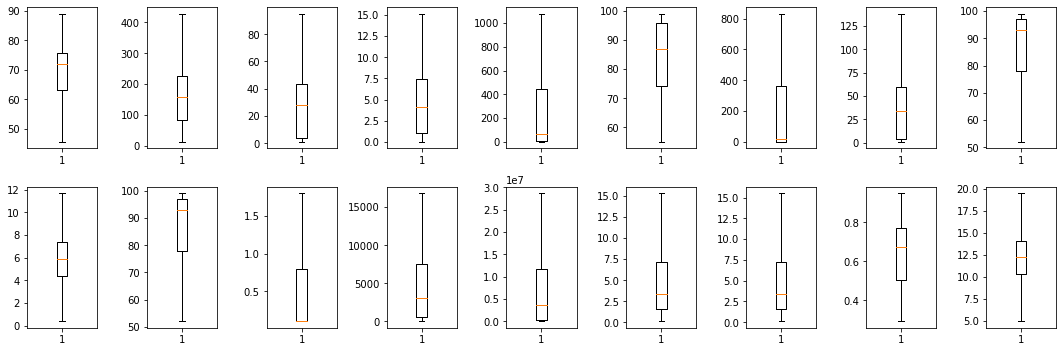

In [21]:
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

The outliers have been dealt with, and the data cleaning section is now finished.

# [Section 2: Data Exploration]()

A new dataframe with the winsorized data should be made before beginning any exploration.

In [22]:
wins_dataset = dataset.iloc[:, 0:3]
for col in cont_vars:
    wins_dataset[col] = wins_dict[col]

The following are the main topics of interest in this section:
 1. Univariate Analysis
    1. continuous variables
    2. categorical variables

2. Bivariate Analysis
   1. Continuous to Continuous variables
   2. Continuous to Categorical variables
   3. Categorical to Categorical variables

### [2.1: Univariate Analysis]()

#### Descriptive statistics

In [23]:
wins_dataset.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.248795,169.191269,28.607323,4.640667,281.501093,83.671293,220.691287,38.640545,85.514684,5.972192,85.469564,0.526991,5033.943592,7.508368e+06,4.703351,4.720470,0.640659,12.049874
std,4.613841,9.462136,107.646049,25.699534,3.910036,384.161450,13.848933,329.192321,37.732345,15.270927,2.302224,15.217611,0.675962,5408.511820,8.646842e+06,3.925702,3.964268,0.171622,3.085673
min,2000.000000,45.600000,13.000000,1.000000,0.010000,0.000000,55.000000,0.000000,1.000000,52.000000,0.370000,52.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.291000,4.900000
25%,2004.000000,63.200000,84.000000,4.000000,1.092500,4.685343,74.099237,0.000000,4.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,157.000000,28.000000,4.140000,64.912906,87.000000,17.000000,34.000000,93.000000,5.910000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.673000,12.300000
75%,2012.000000,75.600000,227.000000,43.766917,7.390000,441.534144,96.000000,360.250000,60.014815,97.000000,7.330000,97.000000,0.800000,7464.487887,1.181332e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,428.000000,95.000000,15.140000,1077.712092,99.000000,831.000000,138.000000,99.000000,11.660000,99.000000,1.800000,16784.346160,2.865628e+07,15.300000,15.500000,0.948000,19.500000


In [24]:
wins_dataset.describe(include='O')

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


#### Visual Distribution

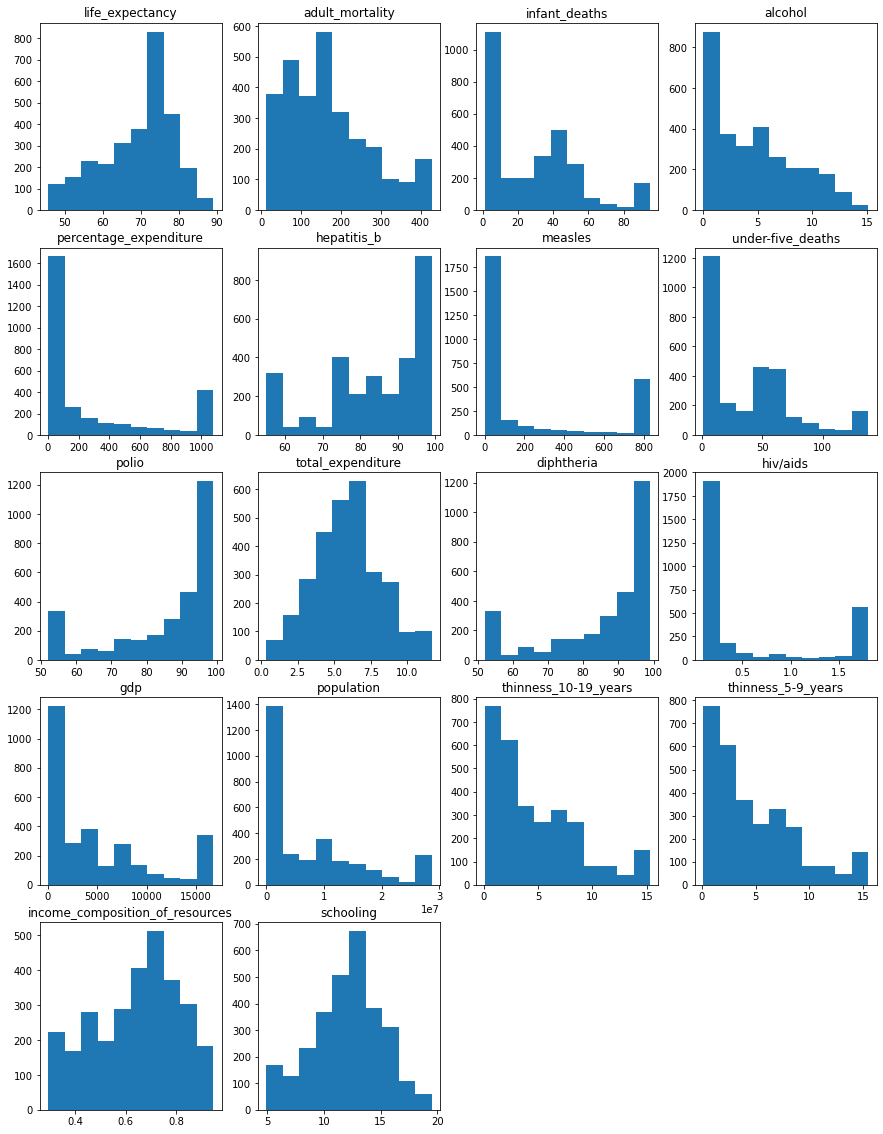

In [25]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(wins_dataset[col])
    plt.title(col)

On some variables, the winsorization had a significant impact, whereas on others, it had less impact. Although all of these variables were winsorized in some way, some variables show the winsorization much more overtly. How many of each of the categorical variables are present in the data—in other words, what is their distribution—and what about them?

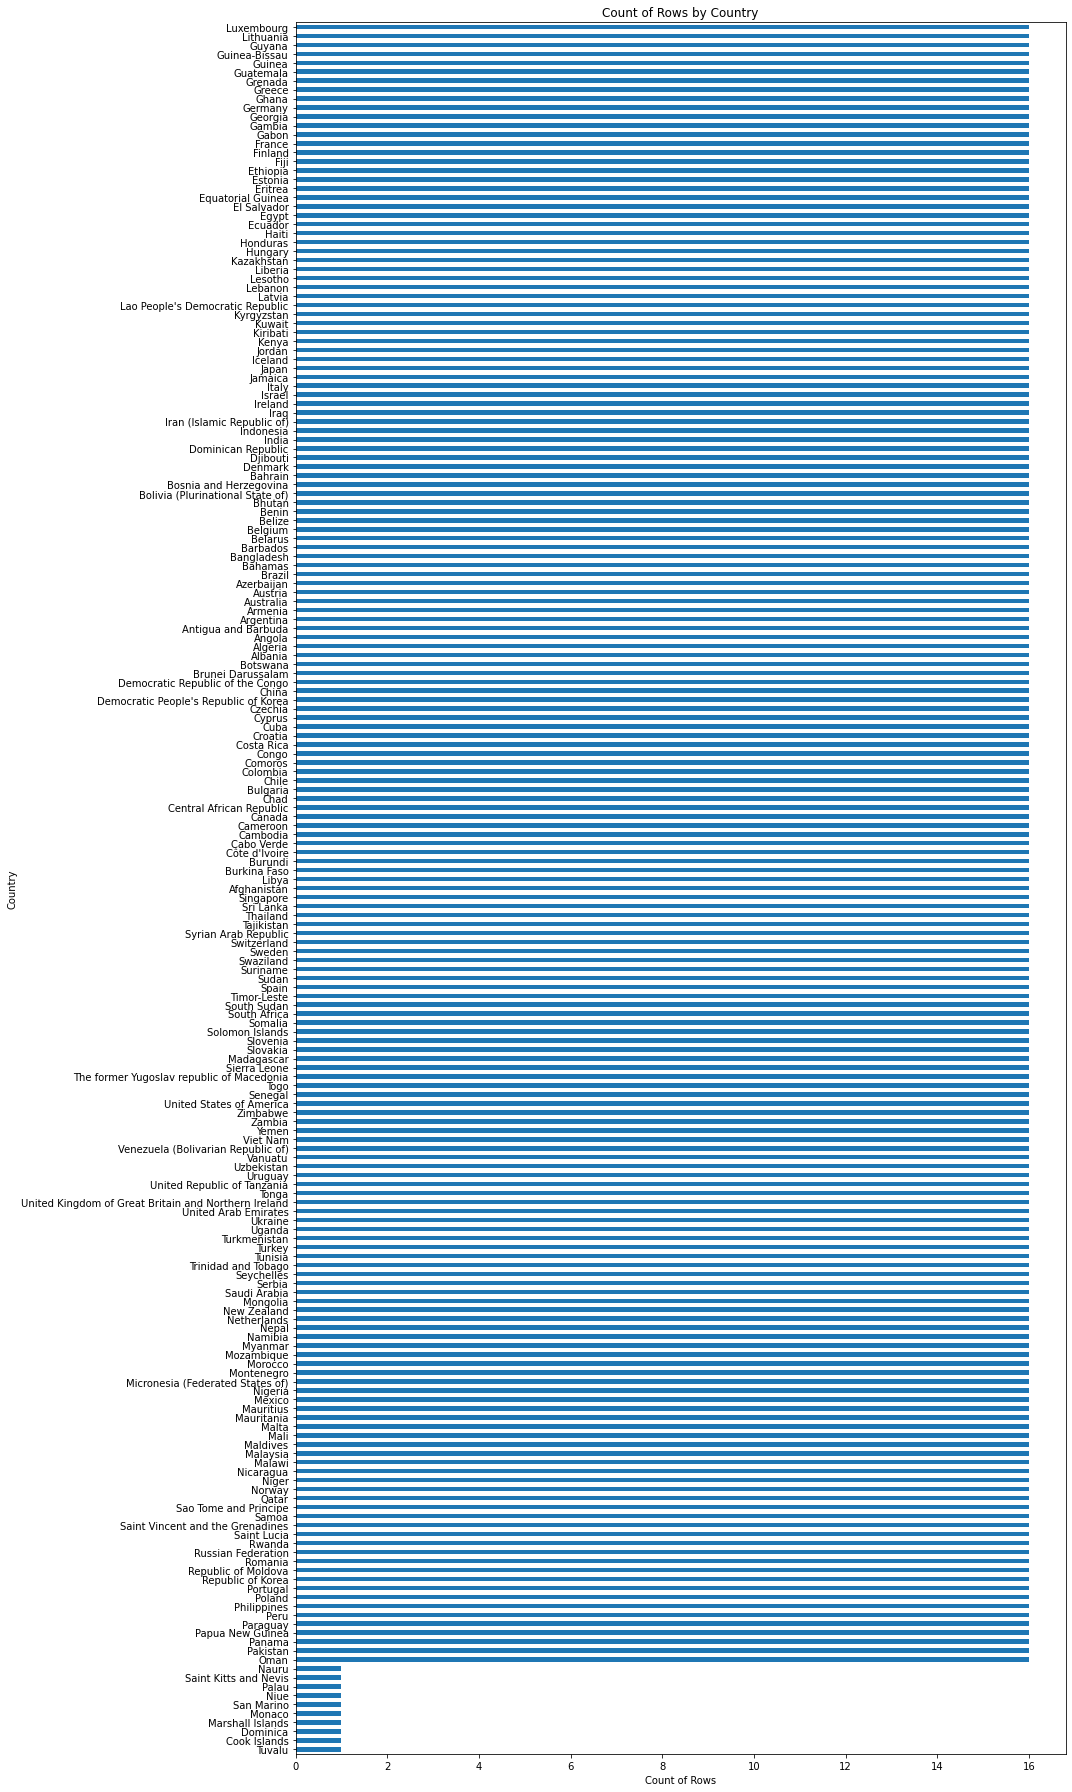

In [26]:
plt.figure(figsize=(15, 25))
wins_dataset.country.value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Although this isn't the most visually appealing graph, it shows that most nations have data for 16 rows (16 years). To make sure that certain nations are not overrepresented, it is crucial to know this.

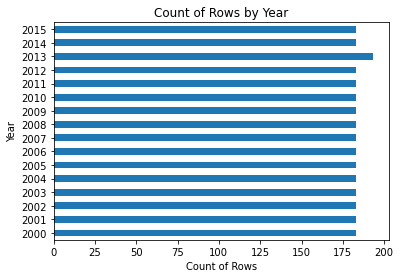

In [27]:
wins_dataset.year.value_counts().sort_index().plot(kind='barh')
plt.title('Count of Rows by Year')
plt.xlabel('Count of Rows')
plt.ylabel('Year')
plt.show()

Again, not the most useful plot, but it does show that there are always the same number of rows, with the exception of 2013, which has 10 more rows than the others (the nations with only one row from the data in the previous graph must be from 2013 alone).This shouldn't have a detrimental effect on analysis

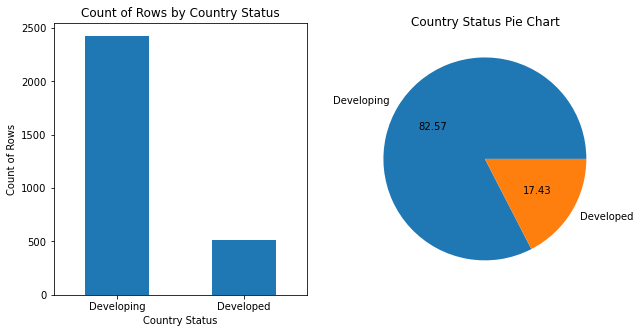

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
wins_dataset.status.value_counts().plot(kind='bar')
plt.title('Count of Rows by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Count of Rows')
plt.xticks(rotation=0)

plt.subplot(122)
wins_dataset.status.value_counts().plot(kind='pie', autopct='%.2f')
plt.ylabel('')
plt.title('Country Status Pie Chart')

plt.show()

### [2.2: Bivariate Analysis]()

#### [2.2.1: Continuous to Continuous Analysis]()

In [29]:
wins_dataset[cont_vars].corr()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
life_expectancy,1.000000,-0.677680,-0.222292,0.395089,0.488440,0.315120,-0.337887,-0.298626,0.573291,0.222306,0.578952,-0.796939,0.501011,0.011363,-0.514966,-0.512694,0.792878,0.742306
adult_mortality,-0.677680,1.000000,0.119906,-0.187971,-0.293870,-0.214673,0.216200,0.168908,-0.348198,-0.121052,-0.351136,0.596271,-0.297774,-0.000562,0.332904,0.339266,-0.511340,-0.450785
infant_deaths,-0.222292,0.119906,1.000000,-0.062119,-0.094053,-0.196145,0.323610,0.966996,-0.217511,-0.086289,-0.225997,0.124310,-0.059337,0.176352,0.196669,0.202573,-0.178389,-0.191062
alcohol,0.395089,-0.187971,-0.062119,1.000000,0.378069,0.106352,-0.197193,-0.104954,0.265830,0.308434,0.272948,-0.193443,0.389598,-0.036283,-0.436755,-0.427166,0.475112,0.519757
percentage_expenditure,0.488440,-0.293870,-0.094053,0.378069,1.000000,0.122870,-0.194687,-0.131361,0.268385,0.159830,0.268411,-0.295791,0.712940,-0.070366,-0.331693,-0.333748,0.556006,0.530422
hepatitis_b,0.315120,-0.214673,-0.196145,0.106352,0.122870,1.000000,-0.266487,-0.239049,0.608008,0.071100,0.647198,-0.278977,0.172066,-0.004936,-0.134103,-0.139528,0.299493,0.290399
measles,-0.337887,0.216200,0.323610,-0.197193,-0.194687,-0.266487,1.000000,0.368517,-0.320104,-0.161737,-0.315164,0.226305,-0.183792,0.222488,0.359571,0.364201,-0.274976,-0.329274
under-five_deaths,-0.298626,0.168908,0.966996,-0.104954,-0.131361,-0.239049,0.368517,1.000000,-0.281667,-0.096826,-0.291057,0.198160,-0.102372,0.180288,0.235471,0.236927,-0.253539,-0.264996
polio,0.573291,-0.348198,-0.217511,0.265830,0.268385,0.608008,-0.320104,-0.281667,1.000000,0.164149,0.855849,-0.475611,0.309033,0.003618,-0.288660,-0.287206,0.515361,0.509788
total_expenditure,0.222306,-0.121052,-0.086289,0.308434,0.159830,0.071100,-0.161737,-0.096826,0.164149,1.000000,0.176715,-0.110629,0.146954,-0.105257,-0.285700,-0.294560,0.185535,0.259746


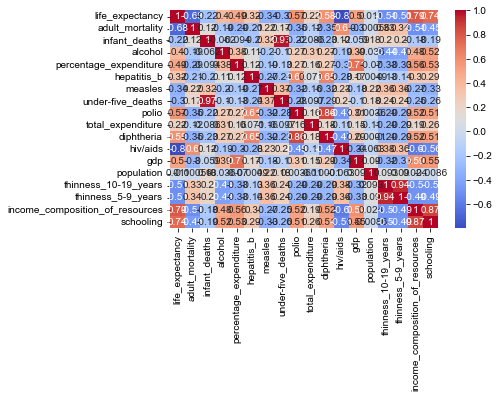

In [30]:
sns.heatmap(data = wins_dataset[cont_vars].corr(),annot=True,cmap="coolwarm")
sns.set(rc = {'figure.figsize':(9,7)})

Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:
1. Adult Mortality (negative)
2. HIV/AIDS (negative)
3. Income Composition of Resources (positive)
4. Schooling (positive)

### [2.2.2: Categorical to Life Expectancy Comparison]()

First, it might be useful to consider how life expectancy has changed over the years.

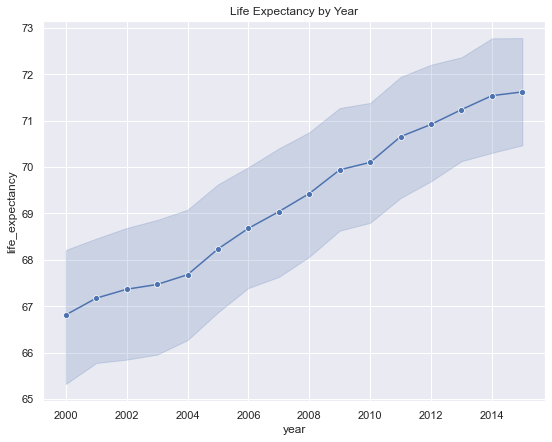

In [31]:
sns.lineplot('year', 'life_expectancy', data=wins_dataset, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

In [32]:
#checking correlation between years and life expentancy
wins_dataset.year.corr(wins_dataset.life_expectancy)

0.16979644964459015

There definitely appears to be a correlation, but are the differences between the years significant enough to be considered different? A t-test comparison will be used to find out.

In [33]:
years = list(wins_dataset.year.unique())
years.sort()

In [34]:
yearly_le = {}
for year in years:
    year_data = wins_dataset[wins_dataset.year == year].life_expectancy
    yearly_le[year] = year_data

In [35]:
yearly_le[2000]

15      54.8
31      72.6
47      71.3
63      45.6
79      73.6
        ... 
2873    72.5
2889    73.4
2905    68.0
2921    45.6
2937    46.0
Name: life_expectancy, Length: 183, dtype: float64

In [36]:
for year in years[:-1]:
    print(15*'-' + str(year) + ' to ' + str(year+1) + 15*'-')
    print(stats.ttest_ind(yearly_le[year], yearly_le[year+1], equal_var=False))

---------------2000 to 2001---------------
Ttest_indResult(statistic=-0.339874273786677, pvalue=0.734147249286317)
---------------2001 to 2002---------------
Ttest_indResult(statistic=-0.18288775743069652, pvalue=0.8549879128960569)
---------------2002 to 2003---------------
Ttest_indResult(statistic=-0.09788073999943862, pvalue=0.922080868750695)
---------------2003 to 2004---------------
Ttest_indResult(statistic=-0.20076791323205204, pvalue=0.8409921852108724)
---------------2004 to 2005---------------
Ttest_indResult(statistic=-0.5360239830703207, pvalue=0.5922696887371386)
---------------2005 to 2006---------------
Ttest_indResult(statistic=-0.43512464639644277, pvalue=0.6637298353979988)
---------------2006 to 2007---------------
Ttest_indResult(statistic=-0.35499521065847695, pvalue=0.7227988446996725)
---------------2007 to 2008---------------
Ttest_indResult(statistic=-0.39657900568183463, pvalue=0.6919107746155075)
---------------2008 to 2009---------------
Ttest_indResult(st

The variations in life expectancy from year to year do not seem to be statistically significant.

now, let's see about "status"

In [37]:
wins_dataset.groupby('status').life_expectancy.agg(['mean'])

,mean
status,
Developed,79.197852
Developing,67.149077


In [38]:
developed_le = wins_dataset[wins_dataset.status == 'Developed'].life_expectancy
developing_le = wins_dataset[wins_dataset.status == 'Developing'].life_expectancy
stats.ttest_ind(developed_le, developing_le, equal_var=False)

Ttest_indResult(statistic=47.96440581661328, pvalue=2e-323)

Based on the result of the above t-test, there appears to be a very significant difference between 'Developing' and 'Developed' countries with respect to their Life Expectancy.

now let's compare the status feature with the all continuous variables

### [2.2.3: Status Variable Compared to other Continuous Variables]()

Since there are only two possible values for the status variable, it is probably best to compare a variety of descriptive statistics for those two values to all the other continuous variables.

In [39]:
wins_dataset_cols = list(wins_dataset.columns)
interested_vars = [wins_dataset_cols[2]]
for col in wins_dataset_cols[4:]:
    interested_vars.append(col)

In [40]:
wins_dataset[interested_vars].groupby('status').agg('mean')

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
status,,,,,,,,,,,,,,,,,
Developed,96.516154,27.956075,9.578444,633.176176,86.930131,127.019531,34.917279,94.324219,7.399336,94.316406,0.100000,10145.447190,6.406971e+06,1.320703,1.29668,0.831395,15.462831
Developing,184.529133,28.744767,3.598565,207.281125,82.983525,240.460429,39.426329,83.655458,5.670997,83.602464,0.617106,3955.176138,7.740814e+06,5.417248,5.44305,0.600405,11.329580


In [41]:
developed_dataset = wins_dataset[wins_dataset.status == 'Developed']
developing_dataset = wins_dataset[wins_dataset.status == 'Developing']
for col in interested_vars[1:]:
    print(10*'-' + str(col) + ' Developed/Developing t-test comparison' + 10*'-')
    print('p-value=' +str(stats.ttest_ind(developed_dataset[col], developing_dataset[col], equal_var=False)[1]))

----------adult_mortality Developed/Developing t-test comparison----------
p-value=3.295961777163392e-145
----------infant_deaths Developed/Developing t-test comparison----------
p-value=0.43706003820584804
----------alcohol Developed/Developing t-test comparison----------
p-value=7.259688493240182e-204
----------percentage_expenditure Developed/Developing t-test comparison----------
p-value=1.0654031797381314e-67
----------hepatitis_b Developed/Developing t-test comparison----------
p-value=2.723238539034132e-12
----------measles Developed/Developing t-test comparison----------
p-value=2.938258449568768e-18
----------under-five_deaths Developed/Developing t-test comparison----------
p-value=0.0018370073332902765
----------polio Developed/Developing t-test comparison----------
p-value=3.1739264406706406e-118
----------total_expenditure Developed/Developing t-test comparison----------
p-value=1.1202855294470609e-39
----------diphtheria Developed/Developing t-test comparison----------
p-

From the above, it is plain to see that there is a significant difference between the following variables with respect to a country's status:

1. Adult Mortality
2. Alcohol
3. Percentage Expenditure
4. Hepatitis B
5. Measles
6. Under Five Deaths
7. Polio
8. Total Expenditure
9. Diphtheria
10. HIV/AIDS
11. GDP
12. Population
13. Thinness of 10 to 19 Year Olds
14. Thinness of 5 to 9 Year Olds
15. Income Composition of Resources
16. Schooling

This suggests that a country's status is probably strongly correlated with the above variables. As mentioned earlier, it also plays a significant role in the difference in life expectancy. The next section of our features should most likely include this variable.

The feature engineering stage of the EDA should now be started after the primary comparisons between all the important and relevant variables have been made.

# [Section 3: Feature Engineering]()

In [42]:
feat_dataset = wins_dataset.join(pd.get_dummies(wins_dataset.status)).drop(columns='status').copy()

In [43]:
feat_dataset.iloc[:, 2:].corr().iloc[:,-2:]

,Developed,Developing
life_expectancy,0.483121,-0.483121
adult_mortality,-0.310207,0.310207
infant_deaths,-0.011644,0.011644
alcohol,0.580249,-0.580249
percentage_expenditure,0.420621,-0.420621
hepatitis_b,0.108121,-0.108121
measles,-0.130744,0.130744
under-five_deaths,-0.045339,0.045339
polio,0.265064,-0.265064
total_expenditure,0.284829,-0.284829


In [44]:
feat_dataset.iloc[:, 2:].corr().iloc[:, -2:].T

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,Developed,Developing
Developed,0.483121,-0.310207,-0.011644,0.580249,0.420621,0.108121,-0.130744,-0.045339,0.265064,0.284829,0.267119,-0.290242,0.434245,-0.058526,-0.395916,-0.396833,0.51065,0.508211,1.0,-1.0
Developing,-0.483121,0.310207,0.011644,-0.580249,-0.420621,-0.108121,0.130744,0.045339,-0.265064,-0.284829,-0.267119,0.290242,-0.434245,0.058526,0.395916,0.396833,-0.51065,-0.508211,-1.0,1.0


From the above it can be observed that whether a country is 'Developed' or not is certainly correlated with a number of variables, but not extremely highly. However, it does have a very low correlation with Infant Deaths, Under Five Deaths and Population.

Next, the categorical columns, 'year' and 'country' will be dropped as they don't have significant differences among life expectancy.

In [45]:
feat_dataset.drop(columns=['country', 'year'], inplace=True)

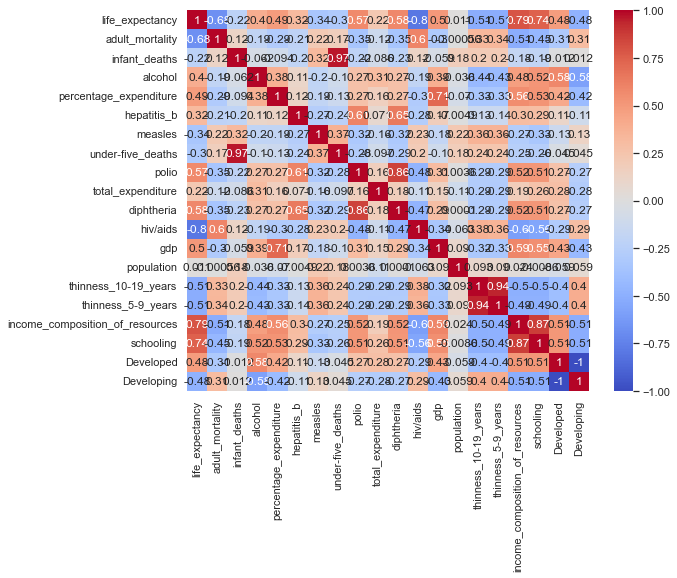

In [46]:

sns.heatmap(data = feat_dataset.corr(),annot=True,cmap="coolwarm")
sns.set(rc = {'figure.figsize':(18,13)})

The following are very/extremely highly correlated (correlation > 0.7 or correlation < -0.7):

In [47]:
feat_dataset.drop(columns=['infant_deaths', 'percentage_expenditure','polio','thinness_10-19_years','schooling','Developing'], inplace=True)

In addition to the above variables, it may also be useful to drop variables which are not very correlated with any of the other variables, the only variable where that is the case is 'Population'

In [48]:
feat_dataset.drop(columns=['population'], inplace=True)

Another look at the correlation heatmap..

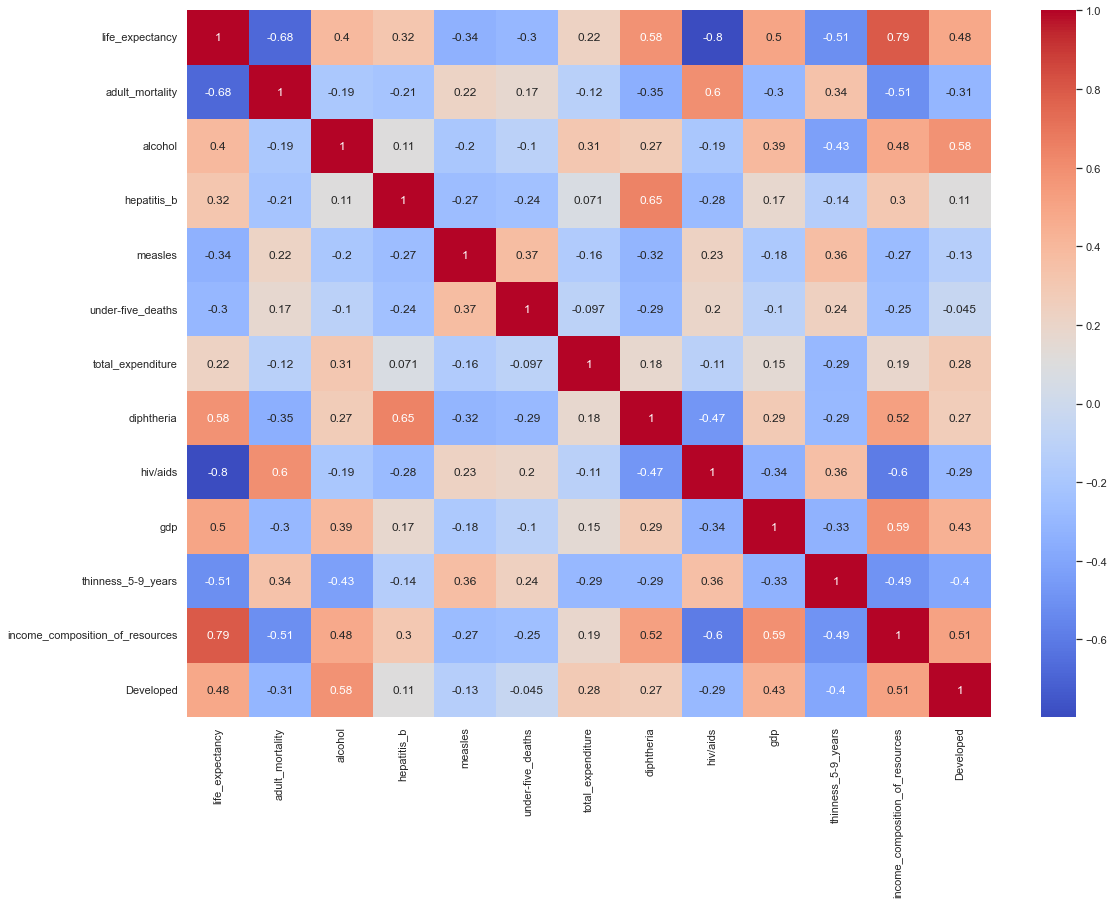

In [49]:
sns.heatmap(data = feat_dataset.corr(),annot=True,cmap="coolwarm")
sns.set(rc = {'figure.figsize':(18,13)})

###### [The features that affect the life expectancy are as follows:]()

1. Adult Mortality
2. Alcohol
3. Hepatitis B
4. Measles
5. Under-Five Deaths
6. Total Expenditure
7. Diphtheria
8. HIV/AIDS
9. GDP
10. Thinness 5-9 Years
11. Income Composition Of Resources
12. Developed

##### This can be used to further make a model about the life expectancy